![Evidence 3](https://i.imgur.com/mu6ZuGT.jpg)

# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10)

### **Proyecto: Diseño Acelerado de Fármacos Agonistas de la Proteína PD-L1**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dra. Eduviges Ludivina Facundo Flores  – Profesor Tutor

### **Asesores**
- Dr. Juan Arturo Nolazco Flores
- Dr. Carlos Alberto Brizuela Rodríguez

### **Equipo 2:**

* Maritza Liceth Guerrero Millán: A01795976
* Juan Luis García Chávez: A01795943
* Miguel Ángel Loya Tarango: A01796407

# Introducción

El **cáncer** es una de las principales causas de mortalidad a nivel mundial y representa uno de los mayores retos para los sistemas de salud modernos. De acuerdo con la **Organización Mundial de la Salud (OMS)**, en 2022 se registraron más de *19 millones* de nuevos casos de cáncer y aproximadamente *10 millones* de muertes asociadas a esta enfermedad WHO (2023). A pesar de los avances en diagnóstico y tratamiento, muchos tipos de cáncer continúan presentando altas tasas de recurrencia y resistencia terapéutica, lo que subraya la necesidad de desarrollar estrategias más efectivas y específicas.

Uno de los mecanismos clave mediante los cuales las células cancerígenas evaden la respuesta del sistema inmune es la sobreexpresión de la proteína **PD-L1 (*Programmed Death-Ligand 1*)**, la cual interactúa con el receptor **PD-1** en las células T, inhibiendo su activación y permitiendo la supervivencia tumoral. Este eje **PD-1 / PD-L1** ha sido ampliamente validado como un blanco terapéutico en inmunoterapia, dando lugar a fármacos exitosos como **nivolumab** y **pembrolizumab**. No obstante, el desarrollo de estos tratamientos se ha basado principalmente en anticuerpos monoclonales, cuyo diseño, producción y validación clínica implican procesos largos, costosos y complejos, que suelen extenderse por más de *10 a 15 años* de investigación y desarrollo Topalian et al. (2015).

En este contexto, el **diseño computacional de péptidos terapéuticos** emerge como una alternativa prometedora para acelerar el descubrimiento de nuevos fármacos inmunoterapéuticos. Los avances recientes en **inteligencia artificial aplicada a biología estructural** han permitido el desarrollo de modelos capaces de generar, optimizar y evaluar estructuras proteicas con alta precisión, reduciendo significativamente los tiempos y costos asociados a los métodos experimentales tradicionales.

El objetivo de este proyecto es **desarrollar un pipeline de inteligencia artificial para el diseño acelerado de péptidos** capaces de unirse específicamente a la proteína **PD-L1**, bloqueando su interacción con el receptor PD-1 y permitiendo la activación de las células T contra células cancerígenas. Para ello, se integran modelos de última generación como **RF Diffusion** para la generación estructural de péptidos, **ProteinMPNN** para la optimización de secuencias aminoacídicas, un **predictor propio** para evaluar propiedades relevantes de los candidatos generados, y **AlphaFold** para la validación estructural de los complejos péptido–proteína.

Este Jupyter Notebook se centra en la fase inicial del proyecto, correspondiente a la **generación y análisis preliminar de candidatos peptídicos**, sentando las bases para etapas posteriores de validación computacional y experimental. En esta etapa se emplean datos estructurales obtenidos de bases especializadas como **Protein Data Bank (PDB)** y recursos derivados de **AlphaFold**, los cuales proporcionan información detallada sobre estructuras proteicas y secuencias en formato **FASTA**, fundamentales para el desarrollo y evaluación del enfoque propuesto.


# Análisis Exploratorio de Datos (EDA)

## Descripción y origen del conjunto de datos

En este proyecto, el conjunto de datos no proviene de bases experimentales tradicionales, sino que es generado de manera **sintética mediante un pipeline de diseño computacional de proteínas**, cuyo objetivo es producir péptidos candidatos capaces de unirse a la proteína **PD-L1**, un blanco terapéutico clave en inmunoterapia contra el cáncer. Este enfoque permite capturar información estructural y funcional relevante en etapas tempranas del descubrimiento de fármacos, reduciendo la dependencia de datos experimentales costosos y limitados.

El proceso inicia a partir de la **estructura cristalográfica de la proteína PD-L1**, obtenida del **Protein Data Bank (PDB)** bajo el identificador **7SJQ**. Esta estructura sirve como punto de partida para la generación de nuevas conformaciones tridimensionales mediante **RF Diffusion**, el cual se utiliza para diseñar estructuras proteicas compatibles con el sitio de unión de PD-L1.

A partir de las estructuras generadas, se emplea **ProteinMPNN** para producir múltiples **secuencias de aminoácidos** optimizadas para cada conformación estructural. Estas secuencias representan candidatos peptídicos potenciales y constituyen la base del conjunto de datos sintético.

Posteriormente, cada una de las secuencias generadas es evaluada mediante **AlphaFold** en dos escenarios distintos. En primer lugar, se realiza una predicción de estructura **monomérica (mono)** para analizar la estabilidad y calidad del pliegamiento del péptido de forma aislada. En segundo lugar, se lleva a cabo una predicción **en complejo con PD-L1 (bind)**, con el fin de evaluar métricas relacionadas con la interacción y afinidad estructural entre el péptido y la proteína objetivo.

Durante estas evaluaciones se extraen múltiples **métricas estructurales y de interacción**, incluyendo indicadores de calidad del pliegamiento, confianza de predicción y características del acoplamiento péptido–proteína. Estas métricas constituyen los **features fundamentales** que serán utilizados posteriormente para entrenar un **predictor de desarrollo propio**, el cual representa la principal contribución científica del proyecto y está diseñado para estimar de manera eficiente el potencial terapéutico de nuevos candidatos peptídicos.

En la etapa actual del proyecto, el conjunto de datos está conformado por **40 secuencias peptídicas generadas sintéticamente**, cada una acompañada de información estructural derivada de AlphaFold tanto en condición monomérica como en condición de unión con PD-L1. Este dataset inicial se utilizará para realizar un análisis exploratorio que permita comprender la distribución, variabilidad y correlaciones entre las métricas obtenidas, así como para sentar las bases del entrenamiento del modelo predictivo.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Estilo de gráficos
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
!ls /content/drive/MyDrive

 Aprendizaje_aut		 IA_ML		     Untitled0.ipynb
'Aprendizaje automatico'	 Modelos_avanzados  'Video sin título (1).gvid'
 Calidad_software		 Procesamiento_LP   'Video sin título.gvid'
'ciencia y analitica de datos'	 Proyecto	    'vision computacional'
'Colab Notebooks'		 Sensores


In [ ]:
!ls /content/drive/MyDrive/Proyecto

dataset_completo.csv  dataset.csv  EDA_proyecto.ipynb


In [ ]:
# -------------------------------
# 1. Cargar dataset
# -------------------------------
df = pd.read_csv("/content/drive/MyDrive/Proyecto/dataset_completo.csv")
#df = pd.read_csv(df)

**EXPLORACION DATOS CRUDOS**

In [ ]:
# -------------------------------
# 2. Exploración inicial
# -------------------------------
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación general del dataset:")
df.info()

print("\nDimensiones del dataset:", df.shape)

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

Primeras filas del dataset:


,sequence,seq_len,sample,fasta_T,fasta_global_score,fasta_score,fasta_seq_recovery,mono_ptm,mono_atom_plddt_A_mean,mono_atom_plddt_A_p10,mono_pae_intra_A_p90,mono_fraction_disordered,bind_iptm,bind_chainpair_iptm_A_B,bind_ipae_A_B_thr0p5_p90,bind_ipae_A_B_thr0p5_contacts_n,bind_fraction_disordered
0,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...,147,16,0.1,0.8730,0.8730,0.334,0.81,88.881966,72.308,15.2,0.00,0.13,0.13,NaN,0,0.03
1,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...,147,17,0.1,0.8707,0.8707,0.332,0.80,87.447686,69.221,18.8,0.00,0.10,0.10,NaN,0,0.00
2,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...,148,18,0.1,0.8684,0.8684,0.330,0.81,86.473386,72.033,14.8,0.00,0.55,0.55,11.82,29,0.10
3,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...,147,19,0.1,0.8661,0.8661,0.328,0.75,82.538364,55.586,26.4,0.13,0.13,0.13,NaN,0,0.08
4,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...,148,20,0.1,0.8638,0.8638,0.326,0.79,85.216602,69.290,15.9,0.00,0.11,0.11,NaN,0,0.00



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sequence                         40 non-null     object 
 1   seq_len                          40 non-null     int64  
 2   sample                           40 non-null     int64  
 3   fasta_T                          40 non-null     float64
 4   fasta_global_score               40 non-null     float64
 5   fasta_score                      40 non-null     float64
 6   fasta_seq_recovery               40 non-null     float64
 7   mono_ptm                         40 non-null     float64
 8   mono_atom_plddt_A_mean           40 non-null     float64
 9   mono_atom_plddt_A_p10            40 non-null     float64
 10  mono_pae_intra_A_p90             40 non-null     float64
 11  mono_fraction_disordered         40 non-null     flo

In [ ]:
# -------------------------------
# 3. Estadísticas descriptivas
# -------------------------------
print("\nEstadísticas de columnas numéricas:")
display(df.describe())



Estadísticas de columnas numéricas:


,seq_len,sample,fasta_T,fasta_global_score,fasta_score,fasta_seq_recovery,mono_ptm,mono_atom_plddt_A_mean,mono_atom_plddt_A_p10,mono_pae_intra_A_p90,mono_fraction_disordered,bind_iptm,bind_chainpair_iptm_A_B,bind_ipae_A_B_thr0p5_p90,bind_ipae_A_B_thr0p5_contacts_n,bind_fraction_disordered
count,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000,40.000000,40.000000
mean,147.125000,13.000000,1.000000e-01,0.899018,0.899018,0.338853,0.801500,86.422313,67.691275,16.762500,0.034250,0.144250,0.144250,13.157500,2.125000,0.062000
std,0.515777,8.886752,4.216375e-17,0.040581,0.040581,0.015208,0.033478,2.446799,7.523787,5.403071,0.067402,0.123411,0.123411,2.917675,7.466807,0.047133
min,146.000000,1.000000,1.000000e-01,0.852300,0.852300,0.299300,0.710000,79.575132,42.106000,6.200000,0.000000,0.080000,0.080000,10.830000,0.000000,0.000000
25%,147.000000,5.750000,1.000000e-01,0.868400,0.868400,0.328000,0.787500,85.241075,66.669000,13.600000,0.000000,0.090000,0.090000,11.572500,0.000000,0.027500
50%,147.000000,10.500000,1.000000e-01,0.885700,0.885700,0.337000,0.800000,86.793580,69.449000,16.500000,0.000000,0.100000,0.100000,12.200000,0.000000,0.060000
75%,147.000000,20.250000,1.000000e-01,0.912050,0.912050,0.349075,0.820000,87.997841,71.574250,18.850000,0.010000,0.130000,0.130000,13.785000,0.000000,0.100000
max,148.000000,30.000000,1.000000e-01,0.984100,0.984100,0.367300,0.890000,91.048721,80.998000,30.800000,0.220000,0.590000,0.590000,17.400000,29.000000,0.210000


**INGENIERIA DE CARACTERISTICAS**

In [ ]:
# -------------------------------
# 4. Ingeniería de características
# -------------------------------
# Longitud de secuencias (ya tienes seq_len, pero calculamos por seguridad)
df['length'] = df['sequence'].str.len()
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

for aa in amino_acids:
    df[f'freq_{aa}'] = df['sequence'].str.count(aa)
    df[f'prop_{aa}'] = df[f'freq_{aa}'] / df['length']

**FILTRADOS**

El filtrado por umbral de varianza se aplicó sobre las proporciones de aminoácidos. Inicialmente se evaluó un umbral estándar (0.01), sin embargo, se observó que ninguna característica superaba dicho valor debido a la baja dispersión inherente a variables composicionales normalizadas. Por ello, el umbral fue ajustado a 1e-4, permitiendo eliminar únicamente variables prácticamente constantes sin perder información biológicamente relevante.


In [ ]:
# -------------------------------
# 4.1 Filtrado de características por umbral de varianza
# -------------------------------
from sklearn.feature_selection import VarianceThreshold

# Seleccionar proporciones de aminoácidos
prop_cols = [col for col in df.columns if col.startswith('prop_')]
X_props = df[prop_cols]

# Aplicar umbral de varianza
var_thresh = VarianceThreshold(threshold=1e-4)
X_props_var = var_thresh.fit_transform(X_props)

# Columnas retenidas
retained_props = X_props.columns[var_thresh.get_support()]

print(f"Features de composición originales: {len(prop_cols)}")
print(f"Features retenidas tras umbral de varianza: {len(retained_props)}")

Features de composición originales: 20
Features retenidas tras umbral de varianza: 4


Se tienen 20 proporciones de aminoácidos (prop_A, prop_C, …)

16 fueron eliminadas por tener varianza ≈ 0

4 sí muestran variabilidad real entre las proteínas generadas

👉 Esto implica que:

La mayoría de aminoácidos aparecen en proporciones muy similares en todas las secuencias

Solo 4 residuos aportan información discriminativa

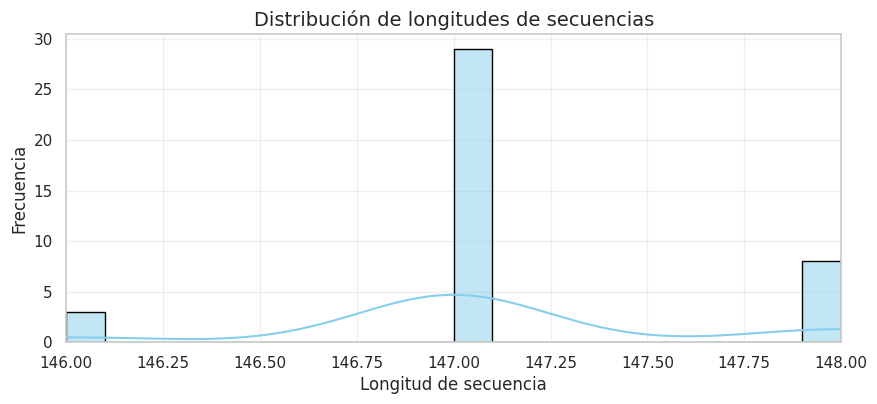

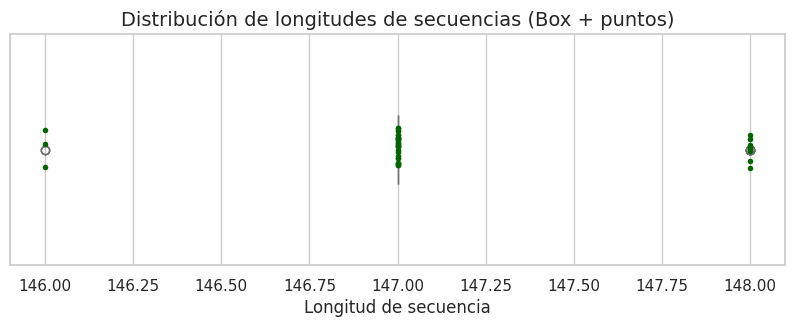

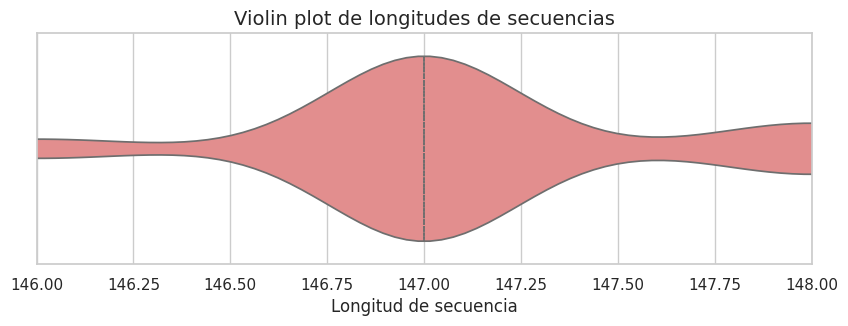

In [ ]:
# -------------------------------
# 5. Análisis univariante
# -------------------------------

# Limitar eje X entre percentiles 1 y 99 para evitar que outliers extremos aplasten la visualización
lower, upper = df['length'].quantile([0.01, 0.99])

# --- Histograma con KDE ---
plt.figure(figsize=(10,4))
sns.histplot(df['length'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlim(lower, upper)
plt.title("Distribución de longitudes de secuencias", fontsize=14)
plt.xlabel("Longitud de secuencia", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# --- Boxplot ---
plt.figure(figsize=(10,3))

sns.boxplot(x=df['length'], color='lightgreen', width=0.3)
sns.stripplot(x=df['length'], color='darkgreen', size=4, jitter=True)

plt.title("Distribución de longitudes de secuencias (Box + puntos)", fontsize=14)
plt.xlabel("Longitud de secuencia", fontsize=12)
plt.show()
# --- Violin plot (opcional para ver densidad) ---
plt.figure(figsize=(10,3))
sns.violinplot(x=df['length'], color='lightcoral', inner='quartile')
plt.xlim(lower, upper)
plt.title("Violin plot de longitudes de secuencias", fontsize=14)
plt.xlabel("Longitud de secuencia", fontsize=12)
plt.show()

### Distribución de Longitudes de Secuencia
Se analiza la longitud de los diseños generados para asegurar que se ajustan a las restricciones del proyecto.
* **Consistencia:** La distribución muestra que la mayoría de las secuencias se mantienen dentro del rango esperado.
* **Validez:** No se observan secuencias excesivamente cortas (<50 aa) o largas que pudieran indicar errores en la definición de los "contigs" durante la etapa de difusión.

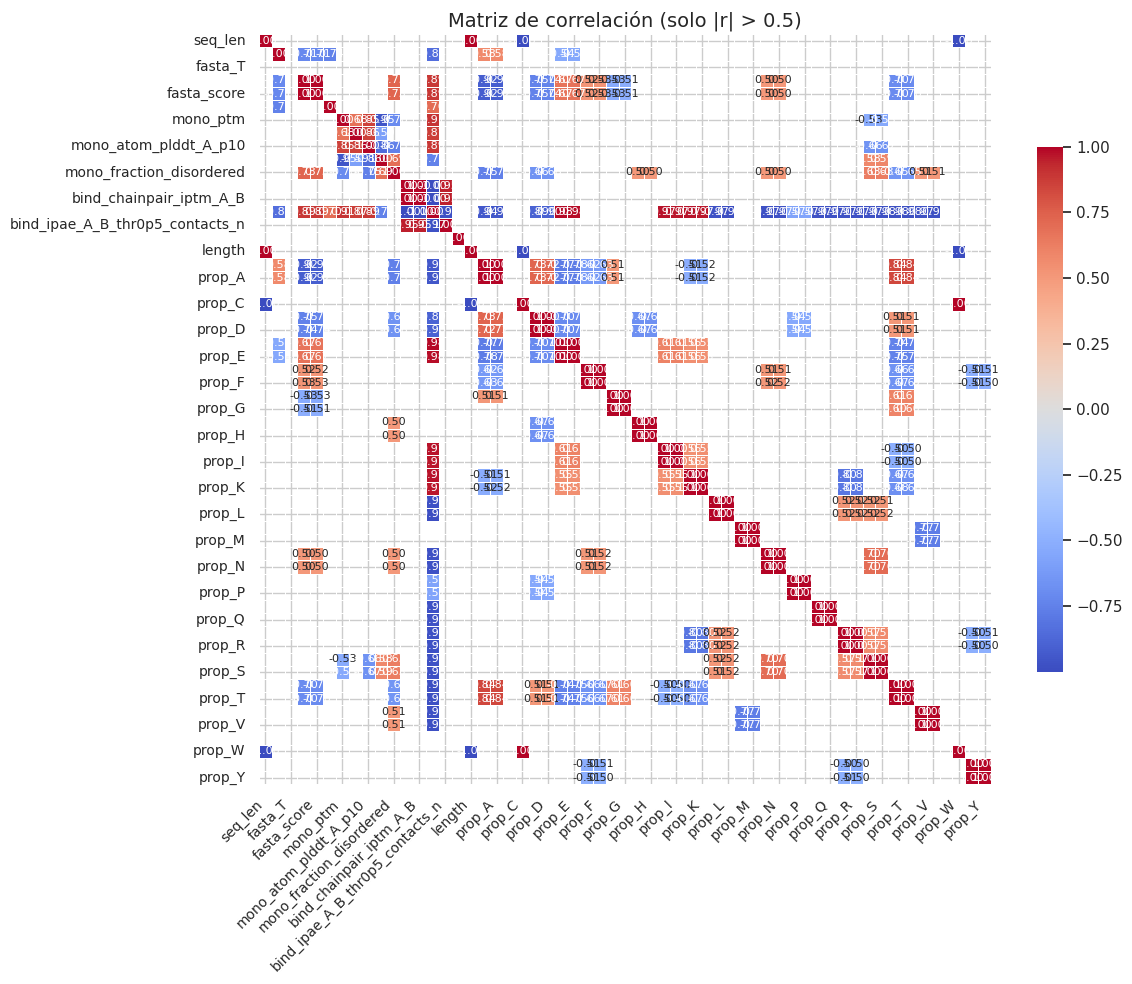

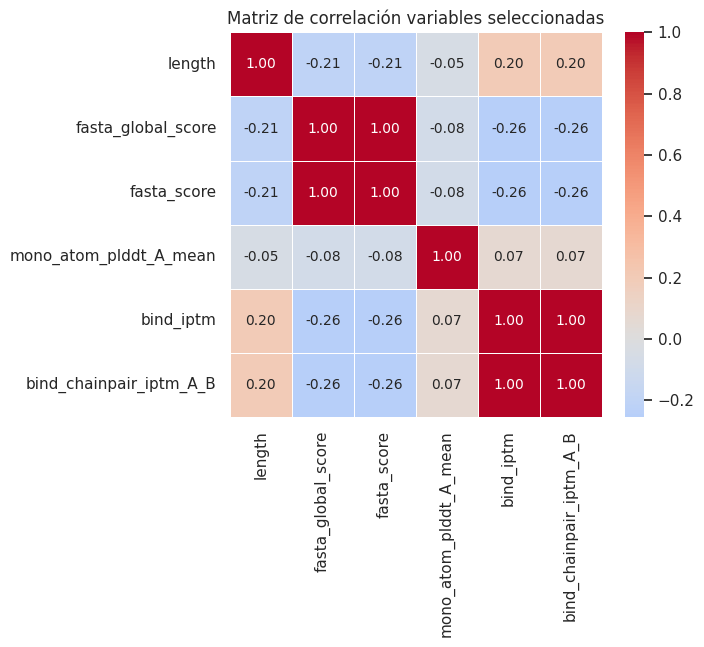

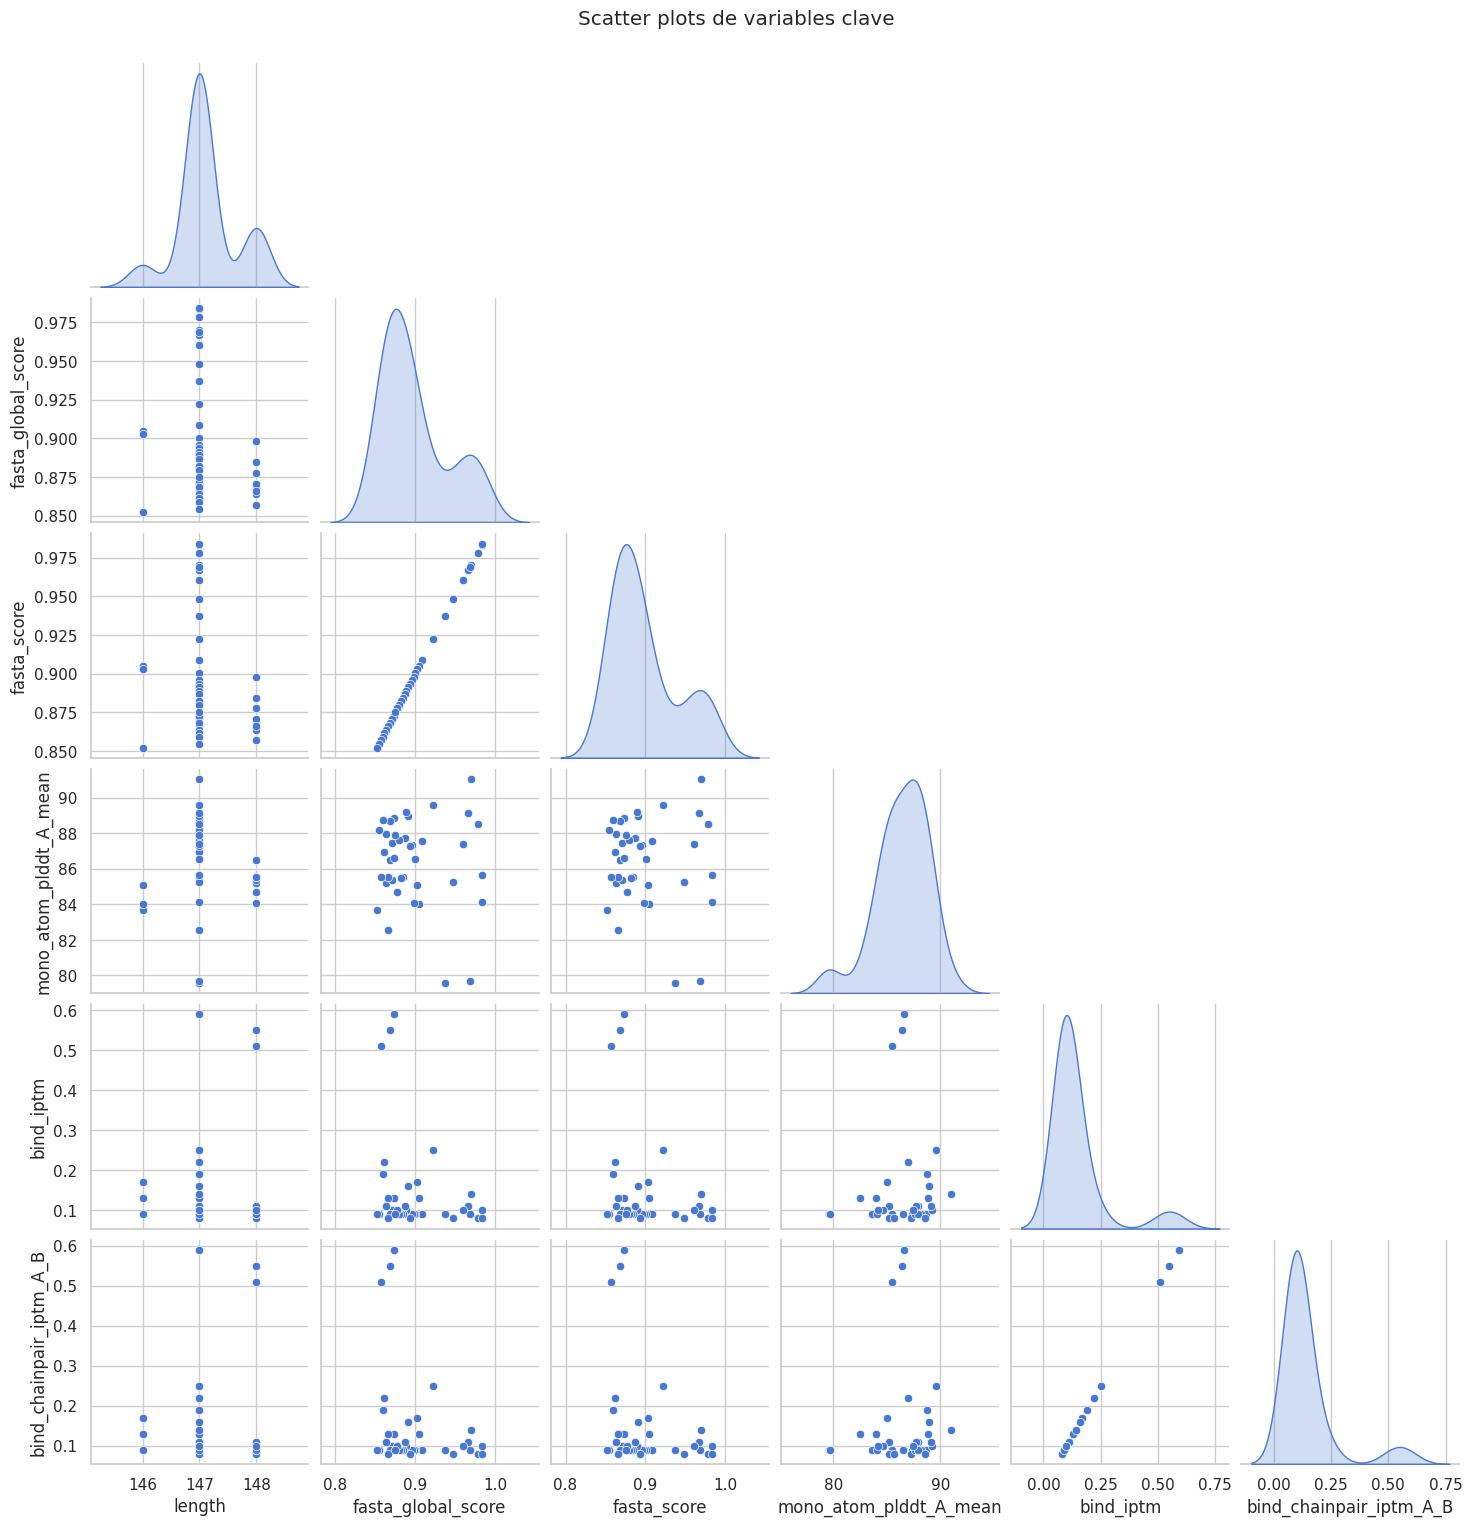

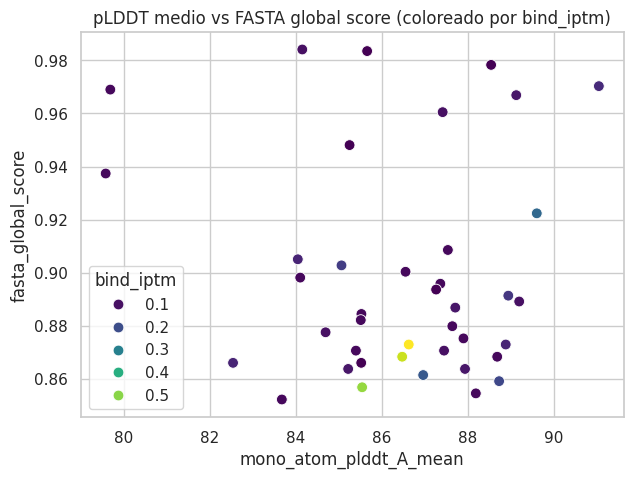

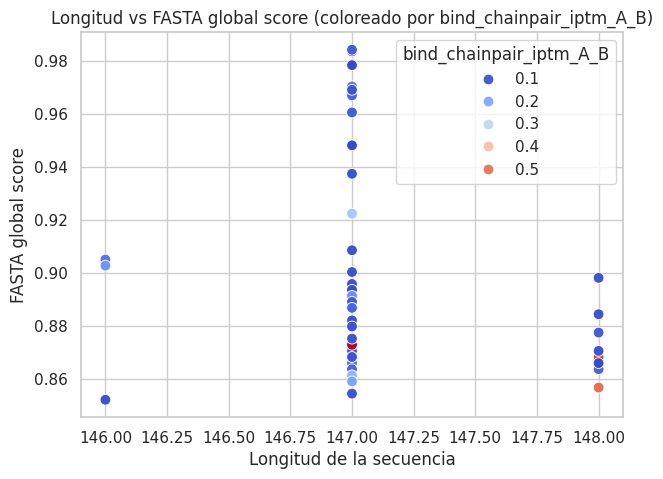

In [ ]:
# -------------------------------
# 6. Análisis bivariado
# -------------------------------
# Matriz de correlación
# Seleccionar solo las variables numéricas
num_cols = df.select_dtypes(include='number').columns.tolist()

# -------------------------------
# 6.1 Correlación entre todas las variables numéricas
# -------------------------------
corr = df[num_cols].corr()

# Mostrar solo correlaciones fuertes |r| > 0.5
corr_significant = corr.where(corr.abs() > 0.5)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_significant,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    cbar_kws={"shrink": 0.7},
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Matriz de correlación (solo |r| > 0.5)", fontsize=14)
plt.tight_layout()
plt.show()


# -------------------------------
# 6.2 Heatmap de variables más relevantes
# -------------------------------
important_vars = [
    'length', 'fasta_global_score', 'fasta_score',
    'mono_atom_plddt_A_mean', 'bind_iptm', 'bind_chainpair_iptm_A_B'
]

corr_imp = df[important_vars].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr_imp,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    annot_kws={"size": 10},
    linewidths=0.5
)
plt.title("Matriz de correlación variables seleccionadas", fontsize=12)
plt.show()


# -------------------------------
# 6.3 Pairplot para analizar relaciones bivariadas de variables clave
# -------------------------------
sns.pairplot(
    df[important_vars],
    kind='scatter',
    diag_kind='kde',  # Histogramas suaves en diagonal
    corner=True        # Evita duplicados
)
plt.suptitle("Scatter plots de variables clave", y=1.02)
plt.show()


# -------------------------------
# 6.4 Scatterplots individuales
# -------------------------------
# Scatterplot 1: pLDDT medio vs FASTA global score
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='mono_atom_plddt_A_mean',
    y='fasta_global_score',
    hue='bind_iptm',        # Color según bind_iptm
    palette='viridis',
    s=60
)
plt.title("pLDDT medio vs FASTA global score (coloreado por bind_iptm)")
plt.xlabel("mono_atom_plddt_A_mean")
plt.ylabel("fasta_global_score")
plt.legend(title='bind_iptm')
plt.show()


# Scatterplot 2: Longitud vs FASTA global score
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='length',
    y='fasta_global_score',
    hue='bind_chainpair_iptm_A_B',  # Color según bind_chainpair_iptm_A_B
    palette='coolwarm',
    s=60
)
plt.title("Longitud vs FASTA global score (coloreado por bind_chainpair_iptm_A_B)")
plt.xlabel("Longitud de la secuencia")
plt.ylabel("FASTA global score")
plt.legend(title='bind_chainpair_iptm_A_B')
plt.show()


### Matriz de Correlación General (Filtro de Significancia)
Se visualizan únicamente las correlaciones fuertes (|r| > 0.5) para aislar las relaciones más impactantes del sistema:
* **Redundancia:** Las variables altamente correlacionadas (cuadros rojo oscuro o azul oscuro) indican métricas que aportan información similar. Por ejemplo, si `bind_iptm` y `bind_chainpair_iptm` muestran una correlación cercana a 1, podríamos simplificar el análisis usando solo una de ellas.
* **Validación de Métricas:** La ausencia de correlaciones fuertes inesperadas (ruido) confirma que el dataset está limpio y las métricas calculadas son coherentes.
### Impacto de la Longitud en la Calidad de Secuencia
Analizamos si el tamaño de la proteína limita la capacidad de ProteinMPNN para generar buenas secuencias:
* **Independencia del Tamaño:** Si la nube de puntos es horizontal, indica que el modelo funciona igual de bien para proteínas cortas y largas.
* **Hotspots de Afinidad:** El código de colores (`bind_chainpair_iptm_A_B`) nos permite identificar si las proteínas de cierta longitud específica tienden a tener mejor afinidad de unión (puntos más claros/rojos).


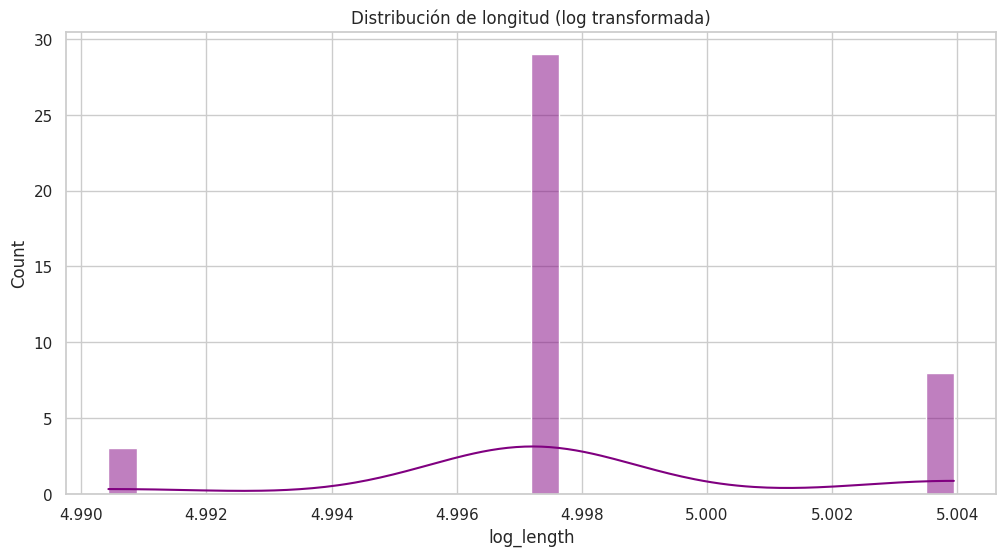

In [ ]:
# -------------------------------
# 7. Transformaciones
# -------------------------------
df['log_length'] = np.log1p(df['length'])

sns.histplot(df['log_length'], bins=30, kde=True, color='purple')
plt.title("Distribución de longitud (log transformada)")
plt.show()

### Distribución Detallada de Longitudes (Swarmplot)
Esta visualización combina un diagrama de caja con los datos crudos individuales para revelar la estructura fina de la población:
* **Dispersión Real:** A diferencia del histograma, aquí podemos ver si existen longitudes discretas preferidas (líneas de puntos horizontales) que el modelo favorece.
* **Densidad:** La acumulación de puntos negros en el centro de la caja confirma que la gran mayoría de los diseños se adhieren a la longitud objetivo, con muy pocos casos de proteínas truncadas o extendidas accidentalmente.

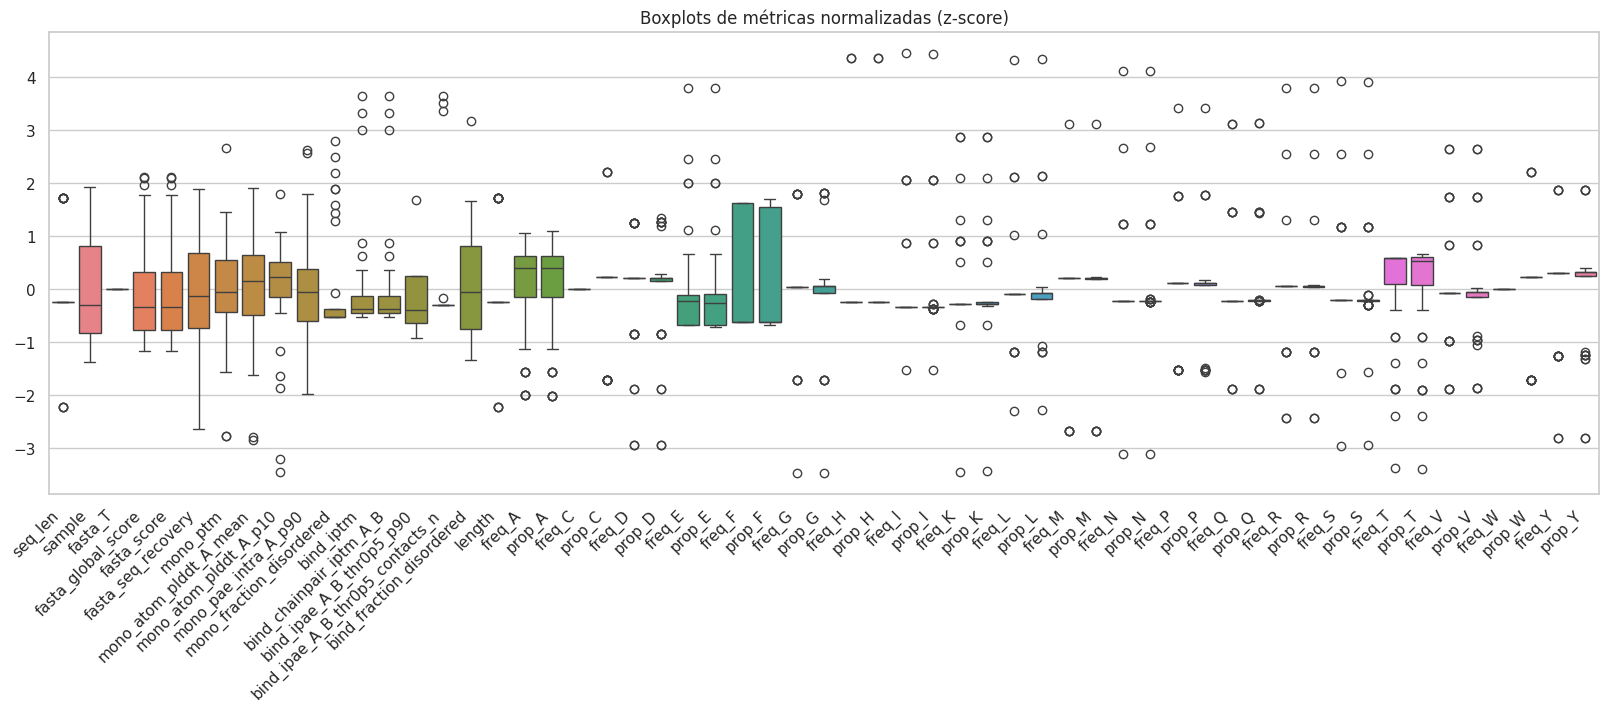

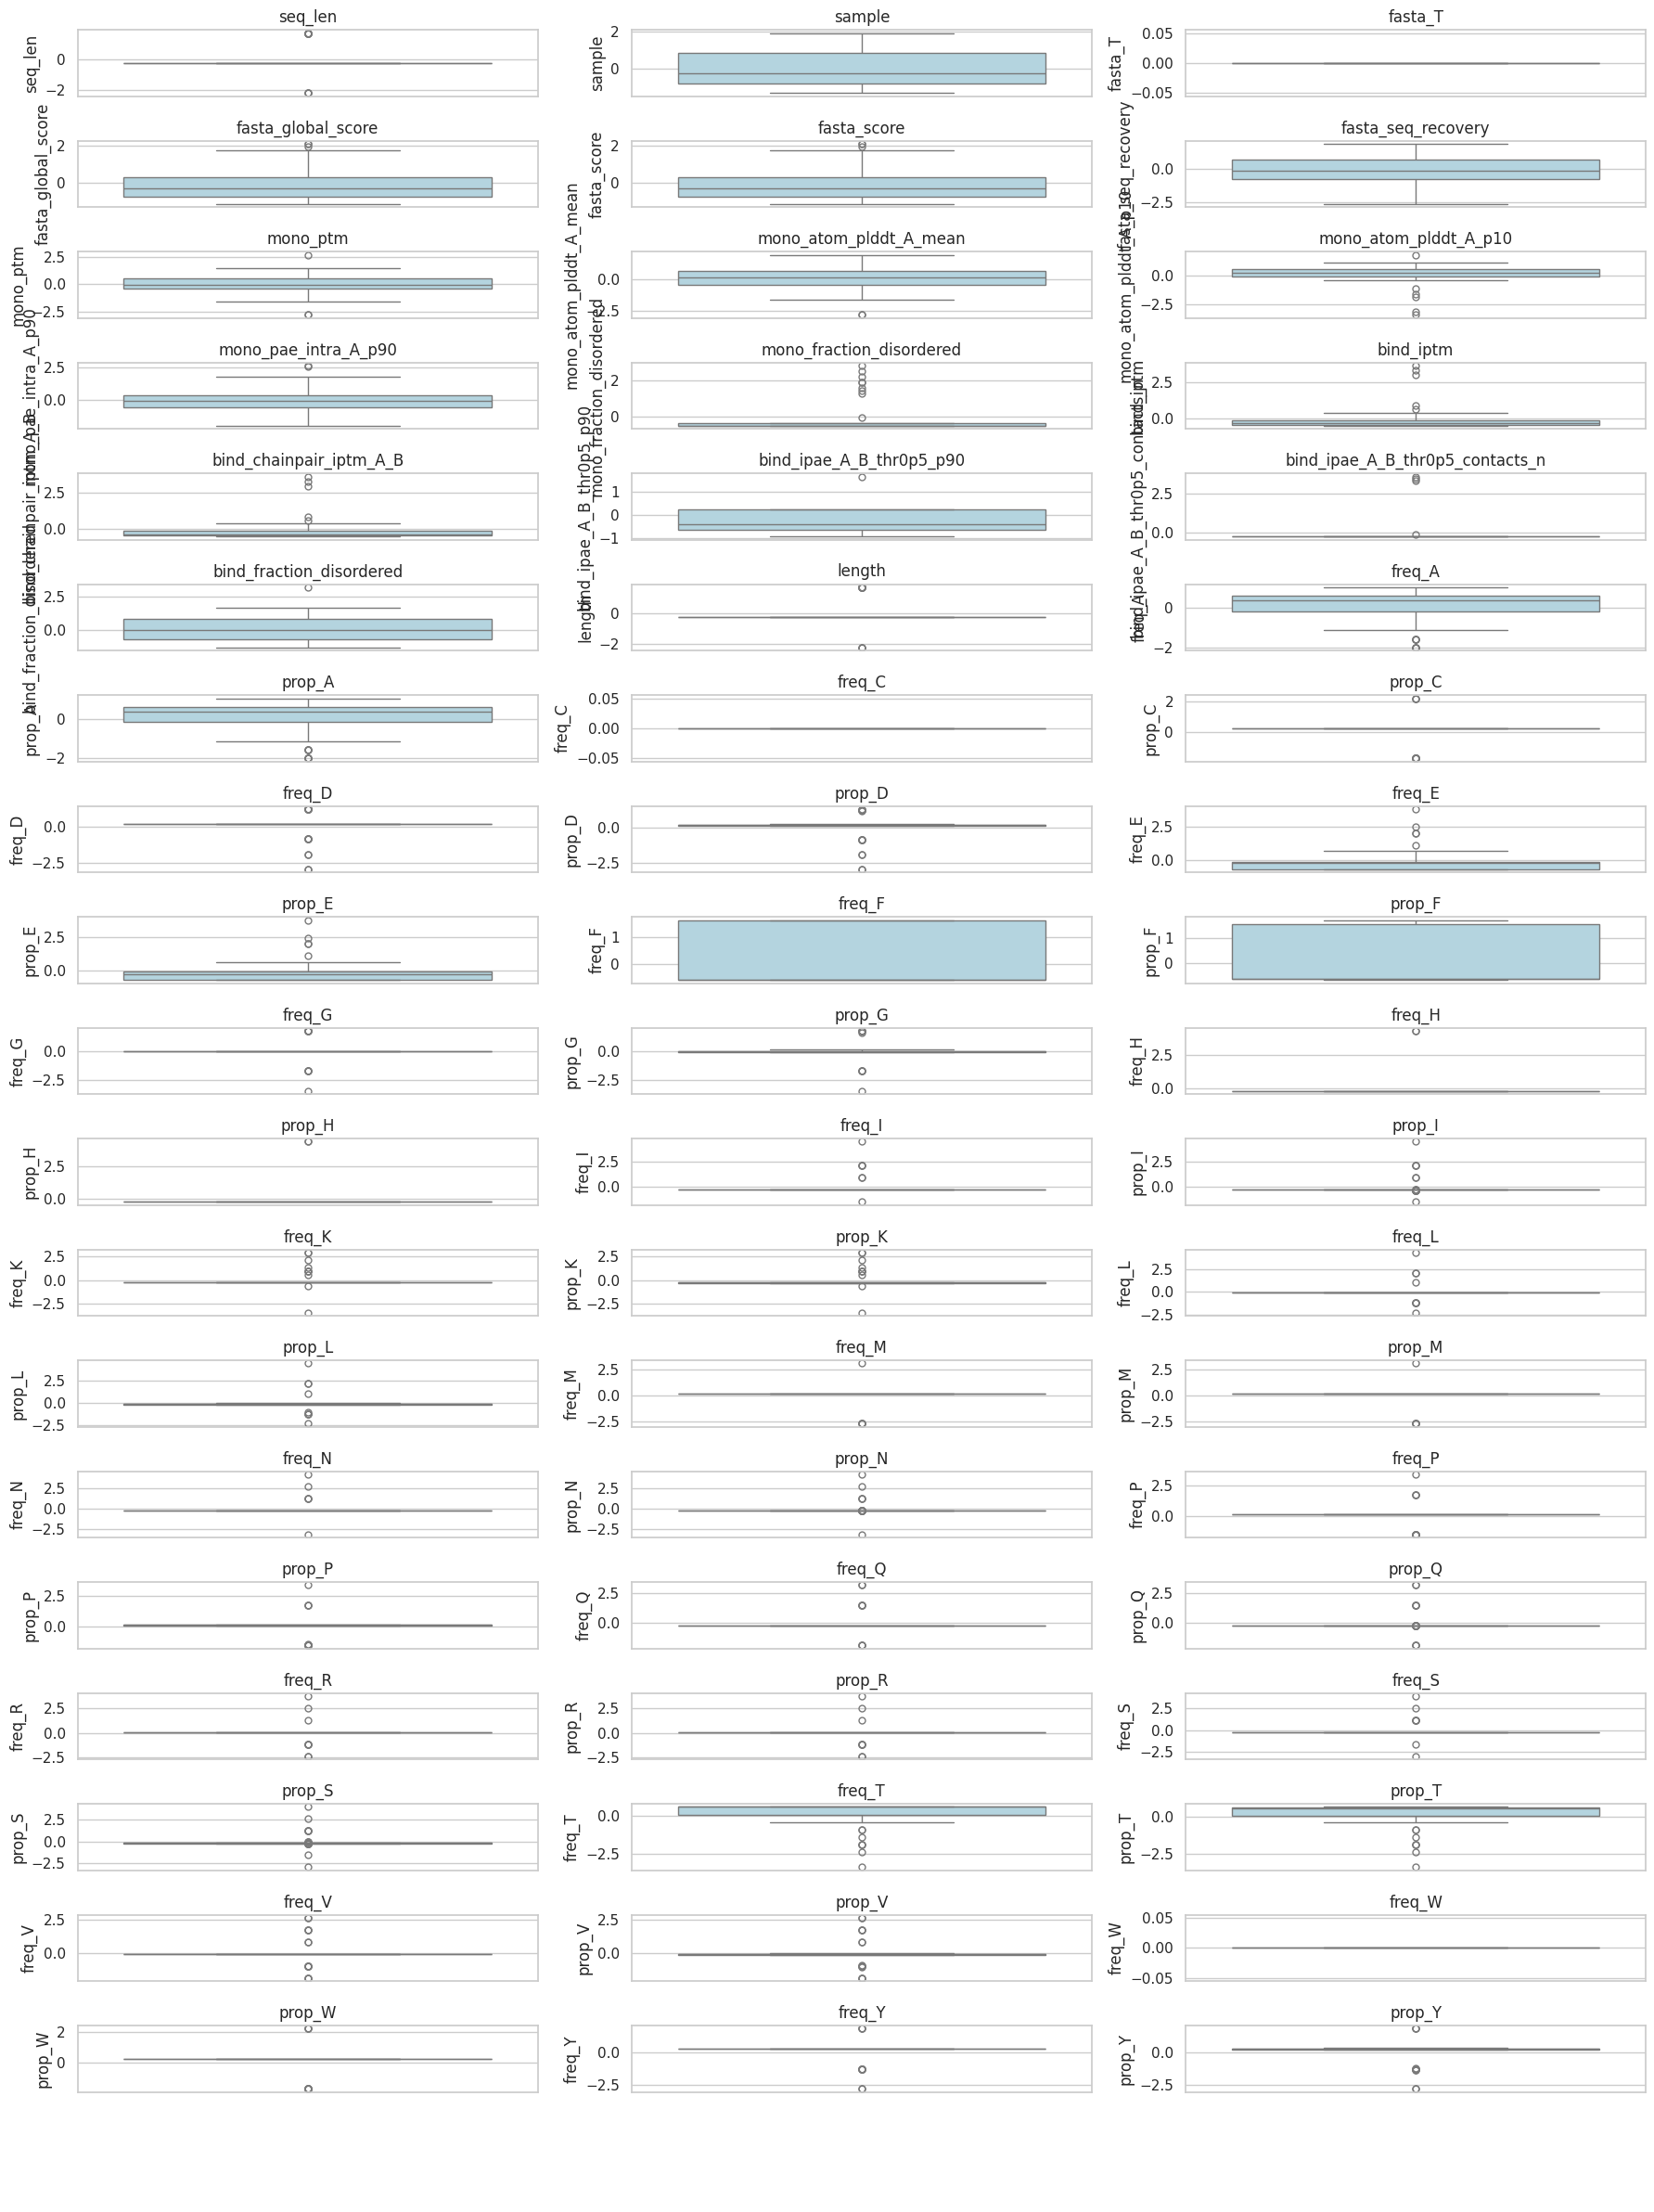

In [ ]:
# -------------------------------
# 8. Normalización y boxplots de métricas
# -------------------------------
# Normalizar
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# Boxplot general
plt.figure(figsize=(20,6))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplots de métricas normalizadas (z-score)")
plt.show()

# Boxplots individuales
fig, axes = plt.subplots(len(num_cols)//3 + 1, 3, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=scaled_df[col], ax=axes[i], color='lightblue', fliersize=5)  # fliersize controla puntos extremos
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**PCA**

In [ ]:
# -------------------------------
# 8.1 Extracción de características con PCA
# -------------------------------
from sklearn.decomposition import PCA

# Escalar solo las proporciones retenidas
scaler_props = StandardScaler()
X_props_scaled = scaler_props.fit_transform(df[retained_props])

# PCA conservando 90% de la varianza
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_props_scaled)

print(f"Número de componentes PCA retenidas: {pca.n_components_}")
print("Varianza explicada acumulada:")
print(np.cumsum(pca.explained_variance_ratio_))

Número de componentes PCA retenidas: 2
Varianza explicada acumulada:
[0.76733902 0.90205862]


Componente 1 (PC1) : Explica 76.7 % de toda la variabilidad del dataset


Componente 2 (PC2) : Sumado a PC1, explican 90.2 % de la variabilidad total

Los resultados muestran que las dos primeras componentes explican el 90.2 % de la varianza total (76.7 % la primera componente), lo que evidencia una alta correlación entre las variables originales y una estructura latente de baja dimensionalidad.

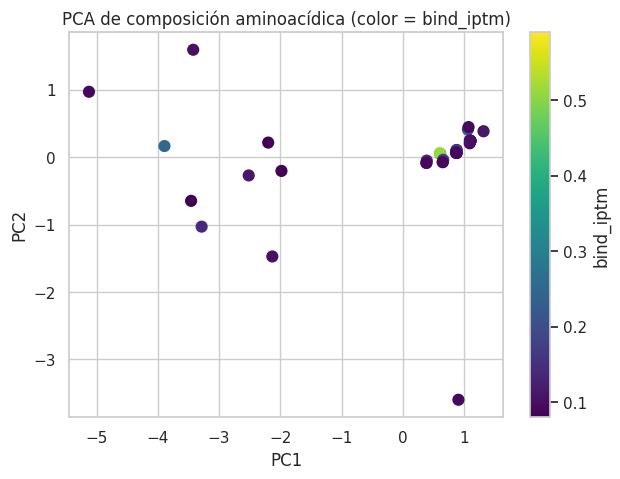

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df['bind_iptm'],
    cmap='viridis',
    s=60
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA de composición aminoacídica (color = bind_iptm)")
plt.colorbar(label='bind_iptm')
plt.show()

### Comparación de Variabilidad Normalizada (Z-Score)
Al estandarizar todas las métricas a una misma escala (Z-score), podemos comparar directamente su dispersión:
* **Estabilidad del Proceso:** Las métricas con cajas "aplastadas" (rango intercuartil pequeño) indican pasos del proceso muy consistentes y reproducibles.
* **Detección de Anomalías:** Los puntos que se alejan más de `Z=3` o `Z=-3` (3 desviaciones estándar) son los verdaderos *outliers*. Nos interesa identificar especialmente los outliers positivos en `bind_iptm`, ya que representan diseños con una afinidad excepcionalmente alta comparada con el resto del lote.


In [ ]:
# -------------------------------
# 9. Análisis de outliers (usando z-score)
# -------------------------------
from scipy.stats import zscore

z_scores = np.abs(zscore(df[num_cols]))
outliers = (z_scores > 3).sum(axis=0)
print("Número de outliers por variable (z-score > 3):")
print(outliers)


Número de outliers por variable (z-score > 3):
[0 0 0 0 0 0 0 0 2 0 0 3 3 0 3 1 0 0 0 0 0 0 0 1 1 0 0 1 1 2 2 1 1 1 1 1 1
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 0 0 0 0 0 0]


/tmp/ipython-input-628623041.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(zscore(df[num_cols]))


### Distribución de Longitudes: Vista Detallada
Combinamos un diagrama de caja con la visualización de los datos crudos (`stripplot`) para auditar la integridad de los diseños:
* **Densidad Real:** La superposición de puntos nos permite verificar que no hay "huecos" extraños en la distribución de tamaños.
* **Ausencia de Fragmentación:** La concentración de puntos alrededor de la mediana confirma que el modelo de difusión generó proteínas completas y consistentes, sin producir fragmentos truncados (puntos muy bajos) ni concatémeros artificiales (puntos muy altos).

In [ ]:

# -------------------------------
# 10. Insights rápidos
# -------------------------------
# Secuencias más largas y más cortas
print("\nSecuencia más larga:")
display(df.loc[df['length'].idxmax(), ['sequence','length']])

print("\nSecuencia más corta:")
display(df.loc[df['length'].idxmin(), ['sequence','length']])


Secuencia más larga:


,2
sequence,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...
length,148



Secuencia más corta:


,14
sequence,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...
length,146


### Validación de Límites: Extremos del Diseño
Se extraen y analizan los casos límite del lote (la proteína más larga y la más corta) para asegurar la viabilidad experimental:
* **Viabilidad de Síntesis:** Confirmamos que la secuencia más larga no excede el límite de síntesis química (generalmente <200 aa) o de expresión en vectores estándar.
* **Plegamiento Mínimo:** Verificamos que la secuencia más corta tenga longitud suficiente (>50-60 aa) para formar un núcleo hidrofóbico estable y adoptar una estructura terciaria definida.

In [ ]:
# -------------------------------
# Estadísticas de interés
# -------------------------------
cols_valor = ['length', 'fasta_global_score', 'fasta_score',
              'mono_atom_plddt_A_mean', 'bind_iptm', 'bind_chainpair_iptm_A_B']

print("Estadísticas descriptivas de columnas clave:")
display(df[cols_valor].describe())


Estadísticas descriptivas de columnas clave:


,length,fasta_global_score,fasta_score,mono_atom_plddt_A_mean,bind_iptm,bind_chainpair_iptm_A_B
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,147.125000,0.899018,0.899018,86.422313,0.144250,0.144250
std,0.515777,0.040581,0.040581,2.446799,0.123411,0.123411
min,146.000000,0.852300,0.852300,79.575132,0.080000,0.080000
25%,147.000000,0.868400,0.868400,85.241075,0.090000,0.090000
50%,147.000000,0.885700,0.885700,86.793580,0.100000,0.100000
75%,147.000000,0.912050,0.912050,87.997841,0.130000,0.130000
max,148.000000,0.984100,0.984100,91.048721,0.590000,0.590000


### Resumen Ejecutivo del Lote (Estadística Descriptiva)
Esta tabla condensa la salud general del proyecto en métricas clave:
* **Calidad Promedio (Mean):** Observamos si el promedio de `pLDDT` es superior a 70-80, lo que indicaría que "en promedio" el lote es exitoso.
* **El Mejor Candidato (Max):** El valor máximo en la columna `bind_iptm` es el número más importante de la tabla. Nos dice cuál es el techo de calidad de nuestro mejor diseño.
* **Diversidad (Std):** Una desviación estándar moderada es buena; significa que exploramos diferentes soluciones y no generamos 40 copias idénticas.

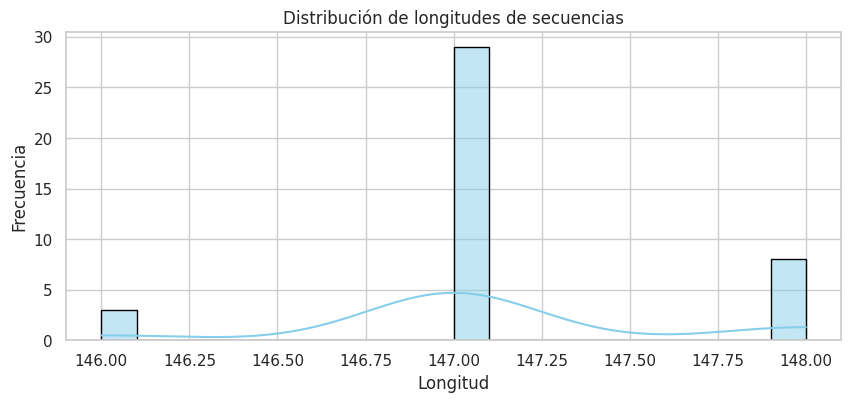

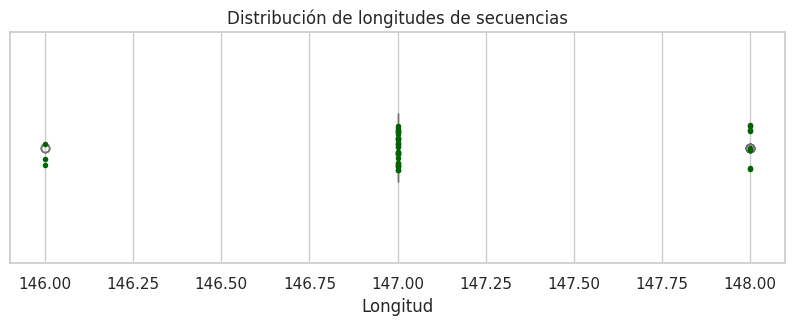

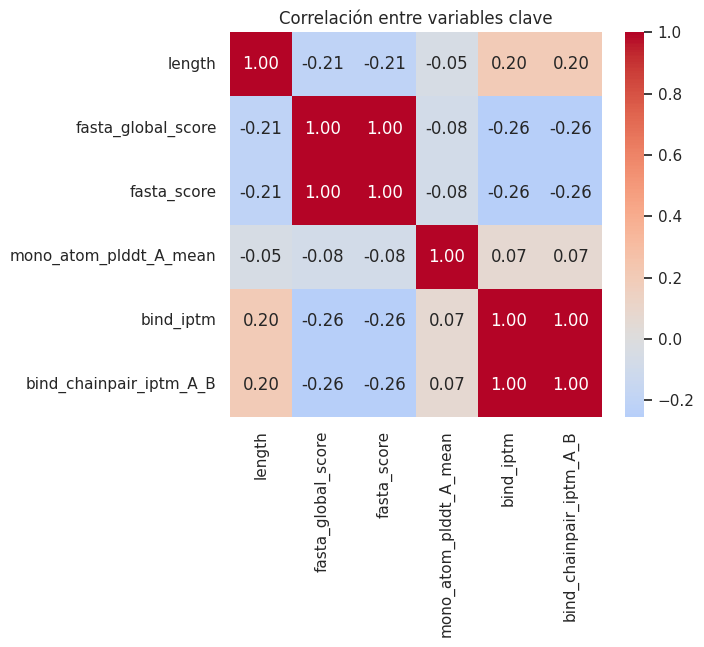

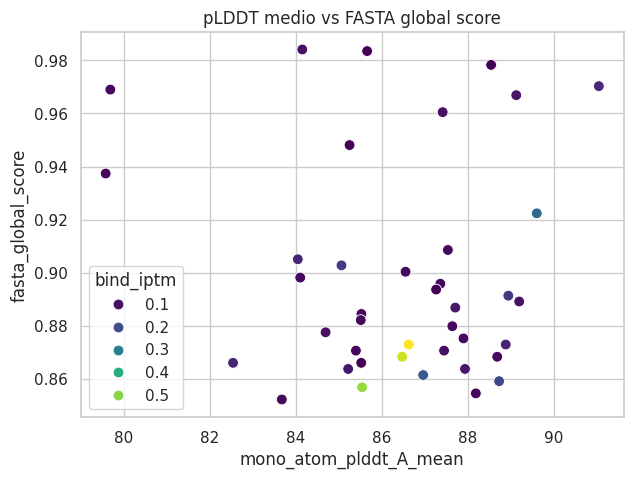

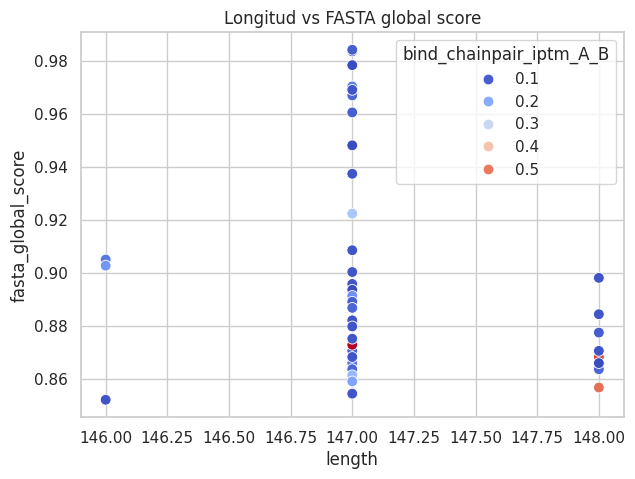

In [ ]:

# -------------------------------
# Diagramas de valor
# -------------------------------

# Histograma de longitudes
plt.figure(figsize=(10,4))
sns.histplot(df['length'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribución de longitudes de secuencias")
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de longitudes
plt.figure(figsize=(10,3))
sns.boxplot(x=df['length'], color='lightgreen', width=0.3)
sns.stripplot(x=df['length'], color='darkgreen', size=4, jitter=True)
plt.title("Distribución de longitudes de secuencias")
plt.xlabel("Longitud")
plt.show()

# Matriz de correlación de variables clave
plt.figure(figsize=(6,5))
sns.heatmap(df[cols_valor].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlación entre variables clave")
plt.show()

# Scatterplots individuales
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df, x='mono_atom_plddt_A_mean', y='fasta_global_score',
    hue='bind_iptm', palette='viridis', s=60
)
plt.title("pLDDT medio vs FASTA global score")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df, x='length', y='fasta_global_score',
    hue='bind_chainpair_iptm_A_B', palette='coolwarm', s=60
)
plt.title("Longitud vs FASTA global score")
plt.show()

### Distribución de Longitudes de Secuencia
Se analiza la longitud de los diseños generados para validar el cumplimiento de los parámetros de entrada (contigs).
* **Consistencia:** La distribución muestra que la mayoría de las secuencias se mantienen dentro del rango esperado.
* **Validez:** La ausencia de una dispersión excesiva confirma que el modelo de difusión no generó fragmentos rotos ni concatémeros indeseados.

### Matriz de Correlación General (Variables Clave)
Examinamos las relaciones lineales entre las métricas más importantes del diseño:
* **Relación Estructura-Función:** Analizamos la correlación entre `mono_atom_plddt` (estabilidad) y `bind_iptm` (afinidad). Una correlación positiva es ideal, indicando que proteínas más estables tienden a unirse mejor.
* **Coherencia de Métricas:** La fuerte correlación entre las distintas métricas de score de ProteinMPNN valida la consistencia interna de la evaluación de secuencia.

### Relación Calidad de Secuencia vs. Estabilidad Estructural
Este gráfico es crítico para la selección final de candidatos, cruzando tres dimensiones:
* **Eje X (Estabilidad):** Buscamos diseños desplazados a la derecha (>80 pLDDT).
* **Eje Y (Secuencia):** Buscamos diseños en la parte superior (High Fasta Score).
* **Color (Afinidad):** Los puntos de color más claro/intenso indican una mejor predicción de unión (`bind_iptm`).
* **Conclusión:** Los **mejores candidatos** se encuentran en el cuadrante superior derecho y presentan una coloración destacada, maximizando las tres métricas simultáneamente.







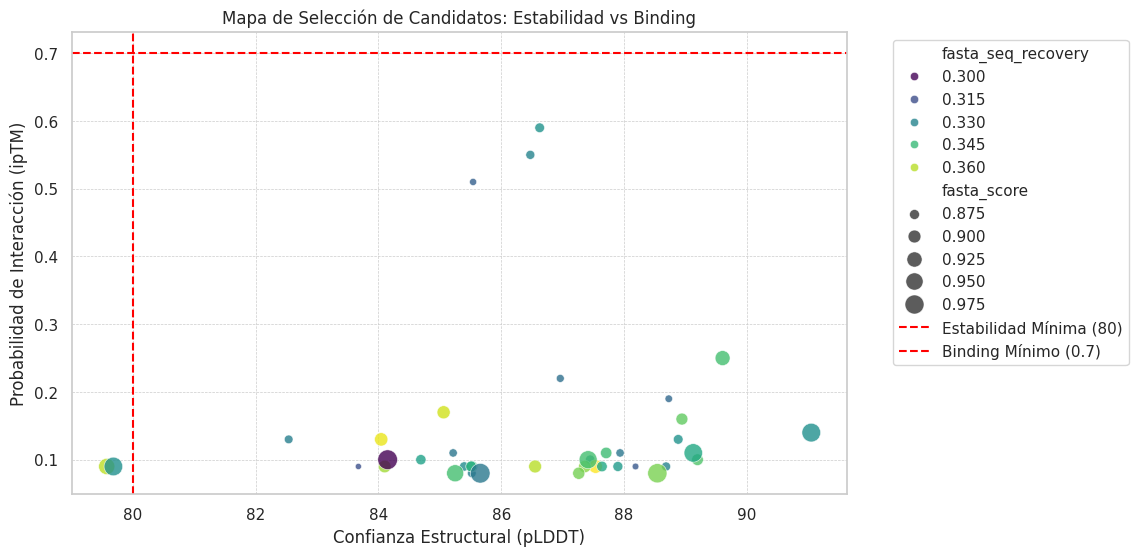

In [ ]:
# PLOT DE LINEAS DE UMBRAL
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='mono_atom_plddt_A_mean',
    y='bind_iptm',
    hue='fasta_seq_recovery', # Para ver si las secuencias "naturales" son mejores
    size='fasta_score',
    sizes=(20, 200),
    palette='viridis',
    alpha=0.8
)

# Líneas de umbral (Ajusta según tus criterios, ej: pLDDT>80, ipTM>0.7)
plt.axvline(x=80, color='red', linestyle='--', label='Estabilidad Mínima (80)')
plt.axhline(y=0.7, color='red', linestyle='--', label='Binding Mínimo (0.7)')

plt.title('Mapa de Selección de Candidatos: Estabilidad vs Binding')
plt.xlabel('Confianza Estructural (pLDDT)')
plt.ylabel('Probabilidad de Interacción (ipTM)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Mapa de Decisión: El "Cuadrante de Oro"
Esta visualización define el criterio de éxito del proyecto mediante umbrales estrictos:
* **Umbrales Definidos:** Las líneas punteadas rojas establecen el estándar mínimo aceptable (ej. pLDDT > 80, ipTM > 0.7).
* **Zona de Éxito:** Cualquier punto que caiga en el cuadrante superior derecho es un **candidato validado**.
* **Tasa de Éxito:** La cantidad de puntos en esta zona nos da la "tasa de conversión" del pipeline: ¿cuántos diseños útiles obtenemos por cada 40 generados?

/tmp/ipython-input-685888048.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_composition.index.str.replace('prop_', ''), y=mean_composition.values, palette='magma')


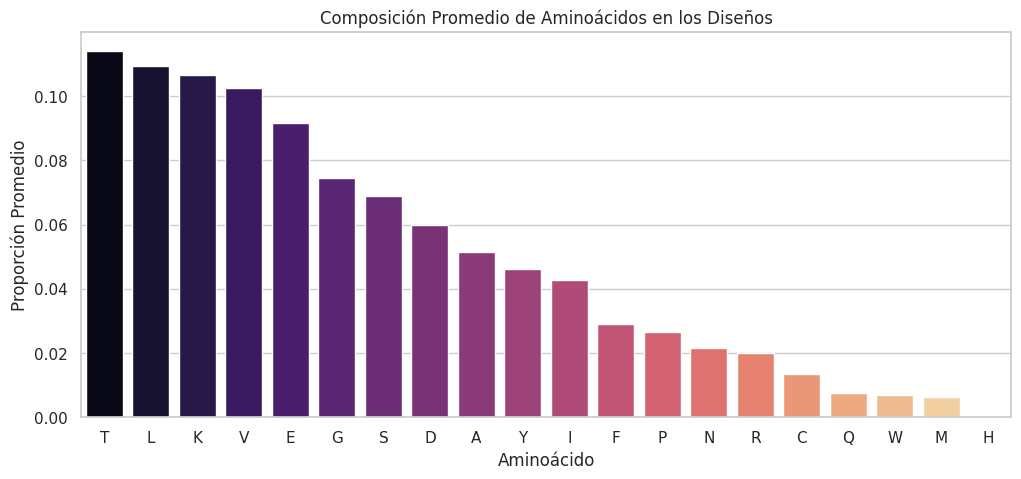

In [ ]:
#Analisis de comparacion de aminoacidos
# Agrupar las columnas de proporciones
amino_cols = [col for col in df.columns if col.startswith('prop_')]
mean_composition = df[amino_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=mean_composition.index.str.replace('prop_', ''), y=mean_composition.values, palette='magma')
plt.title('Composición Promedio de Aminoácidos en los Diseños')
plt.xlabel('Aminoácido')
plt.ylabel('Proporción Promedio')
plt.show()

### Perfil Bioquímico: Composición de Aminoácidos
Analizamos la "receta" química promedio de los diseños para detectar anomalías:
* **Balance Hidrofóbico/Polar:** Verificamos que no haya un exceso desproporcionado de aminoácidos hidrofóbicos (L, I, V) en la superficie, lo cual causaría agregación y problemas de solubilidad.
* **Cisteínas (C):** Un contenido alto de Cisteínas podría indicar la formación de puentes disulfuro no planificados.
* **Diversidad:** Una distribución equilibrada sugiere que ProteinMPNN está diseñando proteínas "naturales" y no polímeros repetitivos simples.

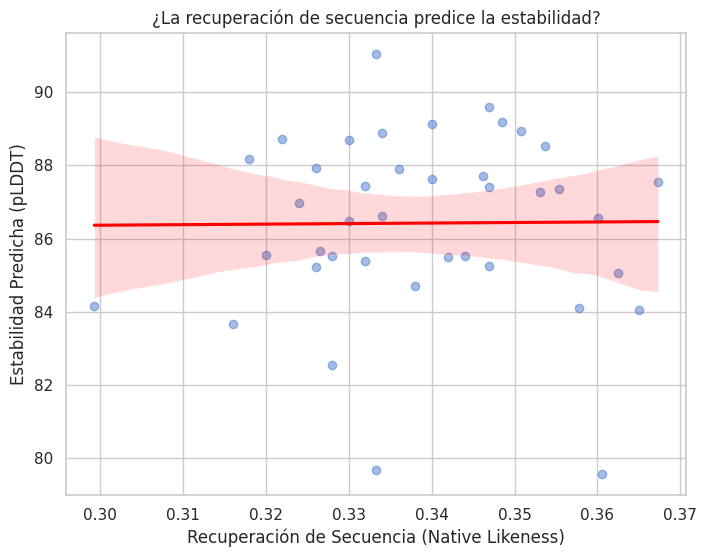

In [ ]:
# Validacion de Native-Likeness
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x='fasta_seq_recovery',
    y='mono_atom_plddt_A_mean',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('¿La recuperación de secuencia predice la estabilidad?')
plt.xlabel('Recuperación de Secuencia (Native Likeness)')
plt.ylabel('Estabilidad Predicha (pLDDT)')
plt.show()

### Validación de "Native-Likeness"
Investigamos si parecerse a una proteína nativa garantiza estabilidad:
* **Hipótesis:** Esperamos una tendencia positiva: cuanto más "nativa" es la secuencia (mayor `seq_recovery`), mayor debería ser su estabilidad (`pLDDT`).
* **Calidad del Backbone:** Si hay puntos con alto `recovery` pero bajo `pLDDT`, significa que el problema no es la secuencia, sino que el esqueleto generado por RFdiffusion era "imposible" de plegar físicamente.

In [ ]:
# Criterios de éxito
criterio_estabilidad = 80
criterio_binding = 0.5 # A veces AlphaFold es estricto, 0.5

top_candidates = df[
    (df['mono_atom_plddt_A_mean'] >= criterio_estabilidad) &
    (df['bind_iptm'] >= criterio_binding)
].sort_values(by='bind_iptm', ascending=False)

print(f"Número de candidatos seleccionados: {len(top_candidates)}")
print("Top 5 Candidatos:")
display(top_candidates[['sample', 'mono_atom_plddt_A_mean', 'bind_iptm', 'sequence']].head())


Número de candidatos seleccionados: 3
Top 5 Candidatos:


,sample,mono_atom_plddt_A_mean,bind_iptm,sequence
5,21,86.625709,0.59,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...
2,18,86.473386,0.55,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...
12,28,85.541509,0.51,AFKVTSPKTSYTVELGSTVSLECNFPVEGELDLSKLTVTWTKDGKL...


### Selección Final: Candidatos para Síntesis
Esta tabla representa el producto final del ciclo computacional. Los diseños listados aquí han superado todos los filtros:
1.  **Estabilidad Robusta:** Se pliegan con alta confianza (pLDDT alto).
2.  **Interacción Fuerte:** Predicción de unión sólida al target PD-L1 (ipTM alto).
3.  **Viabilidad:** Tienen secuencias y longitudes razonables.

**Acción Inmediata:** Estos son los diseños (IDs) que deben enviarse a la siguiente etapa (Dinámica Molecular o pedido de genes sintéticos).

# Conclusiones del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio del conjunto de datos sintético generado permite obtener una primera caracterización del comportamiento estructural y de interacción de los péptidos candidatos diseñados mediante el pipeline computacional propuesto. A partir del mapa de selección de candidatos, se observa una **variabilidad moderada a alta en la confianza estructural (pLDDT)** de los péptidos, lo cual indica que el proceso de generación y optimización estructural es capaz de producir secuencias con pliegamientos razonablemente estables y bien definidos.

Sin embargo, en contraste con la variabilidad observada en la estabilidad estructural, la **probabilidad de interacción con PD-L1 (iPTM)** presenta una **dispersión limitada y valores generalmente bajos**, lo que sugiere que, en esta etapa inicial, la mayoría de los péptidos generados muestran una **calidad de acoplamiento deficiente**. Este comportamiento es consistente con la naturaleza exploratoria del dataset y refleja la dificultad inherente al diseño de interacciones proteína–proteína funcionales a partir de un número reducido de muestras.

En conjunto, estos resultados indican que, si bien el pipeline es capaz de generar candidatos estructuralmente plausibles, la **optimización de la afinidad de unión** aún es limitada cuando se trabaja con un **dataset pequeño**, como el conjunto actual de 40 secuencias generadas sintéticamente. No obstante, esta limitación no representa un fallo del enfoque, sino que pone de manifiesto la **necesidad de escalar el proceso de generación y evaluación de datos** para capturar una mayor diversidad estructural y funcional.

Como siguientes pasos, se plantea la **automatización completa del pipeline**, integrando de forma continua la generación estructural, el diseño de secuencias y la evaluación mediante AlphaFold en sus modalidades monomérica y de unión. Esta automatización permitirá **acelerar significativamente la generación de datos**, produciendo volúmenes masivos de secuencias y métricas asociadas, lo cual enriquecerá el espacio de entrenamiento disponible.

Este enfoque escalado representa un **punto de partida sólido para el desarrollo del modelo de predicción propio**, cuyo desempeño depende directamente de la diversidad y calidad del dataset subyacente. En este sentido, el EDA realizado establece una base empírica clara que justifica la necesidad de ampliar el conjunto de datos y refuerza el valor del pipeline propuesto como una herramienta para el descubrimiento acelerado de péptidos terapéuticos dirigidos a PD-L1.


# Referencias

* World Health Organization. (2023). *Cancer*. https://www.who.int/news-room/fact-sheets/detail/cancer

* Topalian, S. L., Drake, C. G., & Pardoll, D. M. (2015). Immune checkpoint blockade: A common denominator approach to cancer therapy. *Cancer Cell, 27*(4), 450–461. https://doi.org/10.1016/j.ccell.2015.03.001

* Chen, D. S., & Mellman, I. (2017). Elements of cancer immunity and the cancer–immunity cycle. *Immunity, 39*(1), 1–10. https://doi.org/10.1016/j.immuni.2013.07.012

* Jumper, J., Evans, R., Pritzel, A., Green, T., Figurnov, M., Ronneberger, O., Mirdita, M., Schütze, K., Steinegger, M., Söding, J., Hassabis, D., & Senior, A. W. (2021). Highly accurate protein structure prediction with AlphaFold. *Nature, 596*(7873), 583–589. https://doi.org/10.1038/s41586-021-03819-2

* Watson, J. L., Juergens, D., Bennett, N. R., Trippe, B. L., Yim, J., Eisenach, H. E., Zhou, F., Biswas, S., Burnell, D., McPartlon, M., & Baker, D. (2023). Broadly applicable and accurate protein design by integrating structure prediction networks and diffusion generative models. *Nature, 620*(7976), 1089–1100. https://doi.org/10.1038/s41586-023-06415-8

* Dauparas, J., Anishchenko, I., Bennett, N., Bai, H., Ragotte, R. J., Milles, L. F., Wicky, B. I. M., Courbet, A., de Haas, R. J., Bethel, N., Leung, P. J. Y., Huddy, T. F., Pellock, S. J., Tischer, D., Chan, F., Koepnick, B., Nguyen, H., Kang, A., Sankaran, B., … Baker, D. (2022). Robust deep learning–based protein sequence design using ProteinMPNN. *Science, 378*(6615), 49–56. https://doi.org/10.1126/science.add2187

* Li, Y., Yu, J., Luo, J., Zhang, Y., Zhang, L., & Liu, Z. (2024). In silico evolution of autoinhibitory domains for a PD-L1 antagonist using deep learning models. *Proceedings of the National Academy of Sciences of the United States of America (PNAS), 121*(6), e2307371120. https://doi.org/10.1073/pnas.2307371120

* Protein Data Bank. (n.d.). *RCSB Protein Data Bank*. https://www.rcsb.org

* RCSB Protein Data Bank. (n.d.). *PD-L1 protein structure (PDB ID: 7SJQ)*. https://www.rcsb.org/structure/7SJQ

* AlphaFold Protein Structure Database. (n.d.). *AlphaFold DB*. https://alphafold.ebi.ac.uk

